In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns




This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
If user can predict the price of the car based on input features.
Prediction results can be used to give new seller the price suggestion based on market condition.

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataset/cardekho_imputated.csv')
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [3]:
df.shape

(15411, 14)

In [4]:
df.dtypes

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [5]:
df.isna().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [6]:
df.drop(['Unnamed: 0','car_name','brand'],axis=1,inplace=True)
df

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...
15406,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [7]:
cols=['model','seller_type','fuel_type','transmission_type']

le=LabelEncoder()

for col in cols:
  df[col]=le.fit_transform(df[col])

df.dtypes


model                  int64
vehicle_age            int64
km_driven              int64
seller_type            int64
fuel_type              int64
transmission_type      int64
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object

In [8]:
df['selling_price'].value_counts()

450000     357
550000     334
650000     330
350000     320
500000     271
          ... 
117000       1
1064000      1
1472000      1
326000       1
456000       1
Name: selling_price, Length: 1086, dtype: int64

In [9]:
df

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,7,9,120000,1,4,1,19.70,796,46.30,5,120000
1,54,5,20000,1,4,1,18.90,1197,82.00,5,550000
2,118,11,60000,1,4,1,17.00,1197,80.00,5,215000
3,7,9,37000,1,4,1,20.92,998,67.10,5,226000
4,38,6,30000,0,1,1,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...
15406,117,9,10723,0,4,1,19.81,1086,68.05,5,250000
15407,42,2,18000,0,4,1,17.50,1373,91.10,7,925000
15408,77,6,67000,0,1,1,21.14,1498,103.52,5,425000
15409,114,5,3800000,0,1,1,16.00,2179,140.00,7,1225000


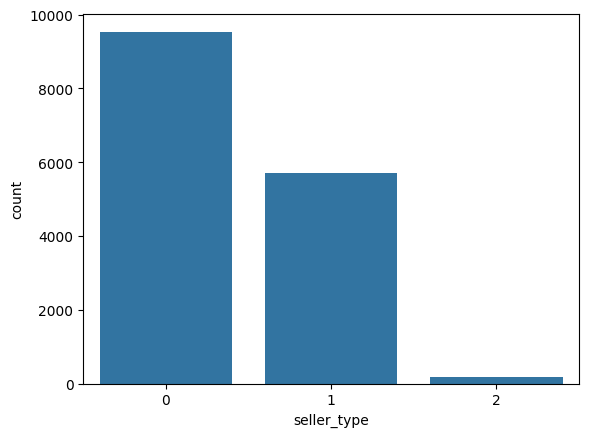

In [11]:
#count of car based on seller type

sns.countplot(x='seller_type', data=df)
plt.show()

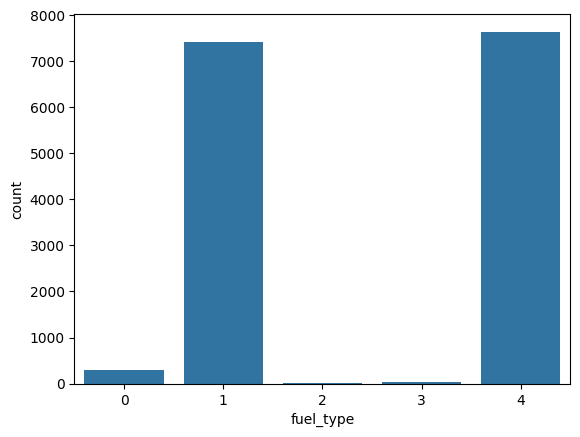

In [12]:
#count of car based on fuel type

sns.countplot(x='fuel_type', data=df)
plt.show()

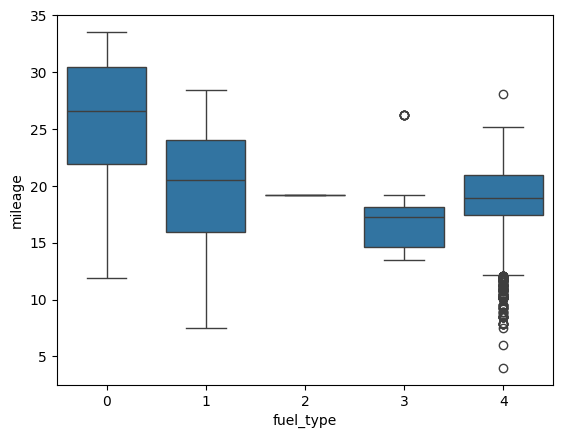

In [13]:
#milege based on diffrent fuel type

sns.boxplot(x='fuel_type', y='mileage', data=df)
plt.show()

In [14]:
X=df.iloc[:,:-1]
X

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,1,4,1,19.70,796,46.30,5
1,54,5,20000,1,4,1,18.90,1197,82.00,5
2,118,11,60000,1,4,1,17.00,1197,80.00,5
3,7,9,37000,1,4,1,20.92,998,67.10,5
4,38,6,30000,0,1,1,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...
15406,117,9,10723,0,4,1,19.81,1086,68.05,5
15407,42,2,18000,0,4,1,17.50,1373,91.10,7
15408,77,6,67000,0,1,1,21.14,1498,103.52,5
15409,114,5,3800000,0,1,1,16.00,2179,140.00,7


In [15]:
y=df.iloc[:,-1]
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [16]:
scaler=MinMaxScaler()

X=scaler.fit_transform(X)
X

array([[5.88235294e-02, 3.10344828e-01, 3.15534619e-02, ...,
        5.17330574e-04, 1.34445201e-02, 5.55555556e-01],
       [4.53781513e-01, 1.72413793e-01, 5.23697992e-03, ...,
        6.96671840e-02, 7.42001361e-02, 5.55555556e-01],
       [9.91596639e-01, 3.79310345e-01, 1.57635727e-02, ...,
        6.96671840e-02, 7.07964602e-02, 5.55555556e-01],
       ...,
       [6.47058824e-01, 2.06896552e-01, 1.76057265e-02, ...,
        1.21572685e-01, 1.10823690e-01, 5.55555556e-01],
       [9.57983193e-01, 1.72413793e-01, 1.00000000e+00, ...,
        2.39006725e-01, 1.72906739e-01, 7.77777778e-01],
       [2.10084034e-01, 6.89655172e-02, 3.39482618e-03, ...,
        1.21400241e-01, 1.34785568e-01, 5.55555556e-01]])

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [18]:
lr=LinearRegression()
rf=RandomForestRegressor(random_state=1)
adb=AdaBoostRegressor(random_state=1)
accuracy=[]

models=[lr,rf,adb]

for model in models:
  print('**********',model,'**********')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('r2score:',r2_score(y_test,y_pred)*100)
  print()
  accuracy.append(r2_score(y_test,y_pred)*100)


********** LinearRegression() **********
r2score: 69.12078063050573

********** RandomForestRegressor(random_state=1) **********
r2score: 94.22718223529031

********** AdaBoostRegressor(random_state=1) **********
r2score: 74.04253597929636



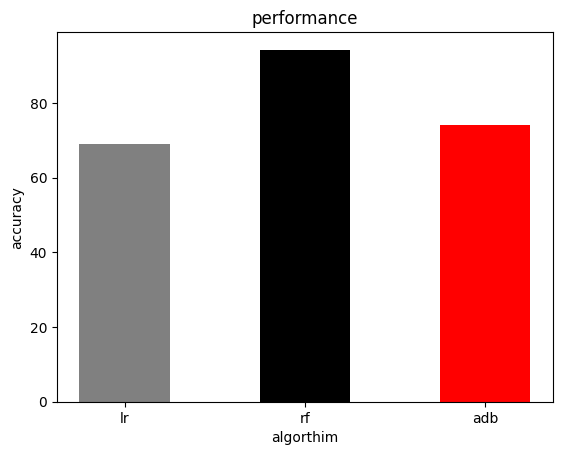

In [19]:
x=['lr','rf','adb']
y=accuracy
plt.bar(x,y,color=['grey','black','red'],width=0.5)
plt.xlabel('algorthim')
plt.ylabel('accuracy')
plt.title('performance')
plt.show()

In [20]:
y_new=rf.predict(scaler.transform([[25	,2	,13000	,0	,4	,0	,18.00	,1497,	117.60	,5]]))
print(y_new)

[1200408.33333333]
